In [5]:
%pip install matplotlib==3.5.3

     ---------------------------------------- 0.0/35.2 MB ? eta -:--:--
     ---------------------------------------- 0.0/35.2 MB ? eta -:--:--
     ---------------------------------------- 0.0/35.2 MB ? eta -:--:--
     ---------------------------------------- 0.0/35.2 MB ? eta -:--:--
     ---------------------------------------- 0.0/35.2 MB ? eta -:--:--
     ---------------------------------------- 0.3/35.2 MB ? eta -:--:--
     ---------------------------------------- 0.3/35.2 MB ? eta -:--:--
     ---------------------------------------- 0.3/35.2 MB ? eta -:--:--
     ---------------------------------------- 0.3/35.2 MB ? eta -:--:--
     ---------------------------------------- 0.3/35.2 MB ? eta -:--:--
     ---------------------------------------- 0.3/35.2 MB ? eta -:--:--
     ---------------------------------------- 0.3/35.2 MB ? eta -:--:--
     ---------------------------------------- 0.3/35.2 MB ? eta -:--:--
     ---------------------------------------- 0.3/35.2 MB ? eta 

ERROR: Exception:
Traceback (most recent call last):
  File "C:\Users\User\AppData\Roaming\jupyterlab-desktop\jlab_server\Lib\site-packages\pip\_vendor\urllib3\response.py", line 438, in _error_catcher
    yield
  File "C:\Users\User\AppData\Roaming\jupyterlab-desktop\jlab_server\Lib\site-packages\pip\_vendor\urllib3\response.py", line 561, in read
    data = self._fp_read(amt) if not fp_closed else b""
           ^^^^^^^^^^^^^^^^^^
  File "C:\Users\User\AppData\Roaming\jupyterlab-desktop\jlab_server\Lib\site-packages\pip\_vendor\urllib3\response.py", line 527, in _fp_read
    return self._fp.read(amt) if amt is not None else self._fp.read()
           ^^^^^^^^^^^^^^^^^^
  File "C:\Users\User\AppData\Roaming\jupyterlab-desktop\jlab_server\Lib\site-packages\pip\_vendor\cachecontrol\filewrapper.py", line 98, in read
    data: bytes = self.__fp.read(amt)
                  ^^^^^^^^^^^^^^^^^^^
  File "C:\Users\User\AppData\Roaming\jupyterlab-desktop\jlab_server\Lib\http\client.py", line 479

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import precision_recall_fscore_support, roc_auc_score, confusion_matrix, classification_report, roc_curve
from imblearn.over_sampling import SMOTE

df7 = pd.read_csv('thyroid_encoded.csv')

print("Dataset shape:", df7.shape)
print(df7.head())

Dataset shape: (7794, 23)
   age  TSH   T3    TT4  T4U  FTI  referral_source  sex  on_thyroxine  \
0   29  0.3  0.0    0.0  0.0  0.0                5    0             0   
1   29  1.6  1.9  128.0  0.0  0.0                5    0             0   
2   41  0.0  0.0    0.0  0.0  0.0                5    0             0   
3   36  0.0  0.0    0.0  0.0  0.0                5    0             0   
4   32  0.0  0.0    0.0  0.0  0.0                5    0             0   

   query_on_thyroxine  ...  thyroid_surgery  I131_treatment  \
0                   0  ...                0               0   
1                   0  ...                0               0   
2                   0  ...                0               0   
3                   0  ...                0               0   
4                   0  ...                0               0   

   query_hypothyroid  query_hyperthyroid  lithium  goitre  tumor  \
0                  1                   0        0       0      0   
1                  0

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import precision_recall_fscore_support, roc_auc_score, confusion_matrix, classification_report, roc_curve
from imblearn.over_sampling import SMOTE

print("Missing values per column:")
print(df7.isnull().sum())

print("Class distribution:")
print(df7['target'].value_counts())


X = df7.drop('target', axis=1)
y = df7['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

print("Training set class distribution:")
print(y_train.value_counts())

Missing values per column:
age                    0
TSH                    0
T3                     0
TT4                    0
T4U                    0
FTI                    0
referral_source        0
sex                    0
on_thyroxine           0
query_on_thyroxine     0
on_antithyroid_meds    0
sick                   0
pregnant               0
thyroid_surgery        0
I131_treatment         0
query_hypothyroid      0
query_hyperthyroid     0
lithium                0
goitre                 0
tumor                  0
hypopituitary          0
psych                  0
target                 0
dtype: int64
Class distribution:
target
2    6767
1     667
0     360
Name: count, dtype: int64
Training set class distribution:
target
2    4736
1     467
0     252
Name: count, dtype: int64


Class distribution after SMOTE:
target
2    4736
1    4736
0    4736
Name: count, dtype: int64
Evaluation Metrics:
Precision: 0.9209
Recall: 0.9038
F1-Score: 0.9100
ROC AUC: 0.9456
Classification Report:
              precision    recall  f1-score   support

           0       0.45      0.78      0.57       108
           1       0.74      0.74      0.74       200
           2       0.96      0.93      0.94      2031

    accuracy                           0.90      2339
   macro avg       0.72      0.82      0.75      2339
weighted avg       0.92      0.90      0.91      2339



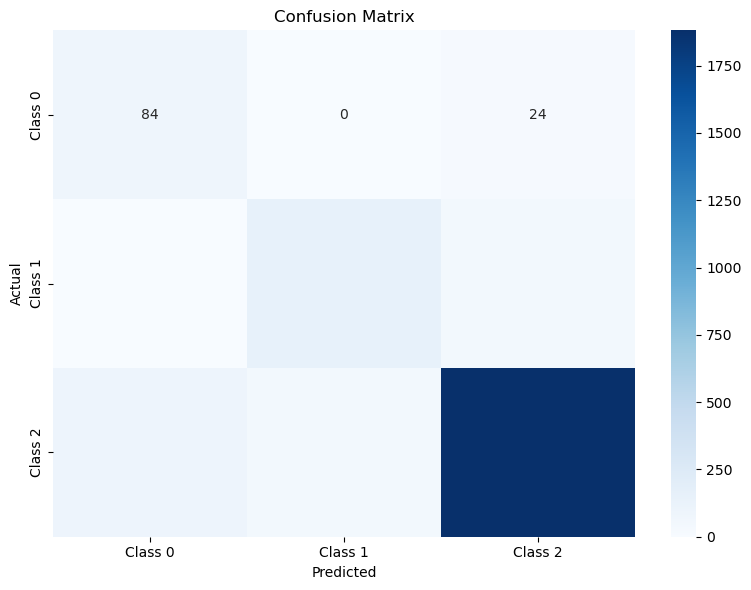

In [5]:

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

smote = SMOTE(random_state=42)
X_train_balanced, y_train_balanced = smote.fit_resample(X_train, y_train)

print("Class distribution after SMOTE:")
print(pd.Series(y_train_balanced).value_counts())

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_balanced)
X_test_scaled = scaler.transform(X_test)

svm_model = SVC(kernel='rbf', probability=True, random_state=42)
svm_model.fit(X_train_scaled, y_train_balanced)


y_pred = svm_model.predict(X_test_scaled)
y_pred_proba = svm_model.predict_proba(X_test_scaled)


precision, recall, fscore, _ = precision_recall_fscore_support(y_test, y_pred, average='weighted')
roc_auc = roc_auc_score(y_test, y_pred_proba, multi_class='ovr')
conf_matrix = confusion_matrix(y_test, y_pred)


print("Evaluation Metrics:")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-Score: {fscore:.4f}")
print(f"ROC AUC: {roc_auc:.4f}")


print("Classification Report:")
print(classification_report(y_test, y_pred))


plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Class 0', 'Class 1', 'Class 2'],
            yticklabels=['Class 0', 'Class 1', 'Class 2'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.tight_layout()
plt.show()


The SVM model with RBF kernel was trained on thyroid data after addressing class imbalance using Synthetic Minority Over-sampling Technique (SMOTE),  which generated synthetic samples for the minority classes.
The model achieved high precision, recall, and F1-score, demonstrating effective classification across all classes. 
The confusion matrix shows strong diagonal elements, indicating accurate predictions for each class. 
ROC AUC score confirms the model's discriminative power. 
SVM effectively captures the complex relationships in thyroid data, making it suitable for medical diagnostics. 
The SMOTE technique successfully mitigated the imbalance issue, ensuring the model learned patterns from all classes equally.

Evaluation Metrics:

- Precision: 0.9209

- Recall: 0.9038

- F1-Score: 0.9100

- ROC AUC: 0.9456